# Resnet AUC/ROC Notebook

## This is a notebook to facilitate training Resnet50 out of the box using a generator and augmentation, but also with a validation data pool to test on that the algorithm has never seen before to ensure that for AUC/ROC testing the algorithm hasn't measured the data pool

First, we make new directories for training and validation data and copy the data we want to use from the original directory to the new training data directory

In [6]:
!mkdir /home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data
!mkdir /home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data
!cp -r /home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/* /home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data

mkdir: cannot create directory ‘/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data’: File exists


Find all files with a .npy suffix, shuffle them so that there are 150 random ones at the top, and them copy them into the new validation data directory

In [5]:
!find /home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy -type f -name "*.npy" -print0 | xargs -0 shuf -e -n 150 -z | xargs -0 cp -vt /home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data

'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/6UI52CFMWHR6UH22_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/6UI52CFMWHR6UH22_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/1SDZGHSOKOCXJ82G_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/1SDZGHSOKOCXJ82G_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/TUI0SHMO3IO4PT8Z_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/TUI0SHMO3IO4PT8Z_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/QNAGLY5L1PQ4Y2QS_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/QNAGLY5L1PQ4Y2QS_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/3AWM4ZZHCWJ8MREY_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/3AWM4ZZHCWJ8MREY_mip.npy'
'/home/harold_triedman/elvo-an

'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/OQNPNGEBR4D54PRA_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/OQNPNGEBR4D54PRA_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/YMTB3QZYNO0L8JB2_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/YMTB3QZYNO0L8JB2_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/ZUR2IKTUC2KQVB2X_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/ZUR2IKTUC2KQVB2X_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/SZY3J4UTKSCFM2H4_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/SZY3J4UTKSCFM2H4_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/PFIIEXEJM7FY3N5Q_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/PFIIEXEJM7FY3N5Q_mip.npy'
'/home/harold_triedman/elvo-an

'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/2WEAS2OYMHM0QP0M_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/2WEAS2OYMHM0QP0M_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/YYNFU45K2WIMXWE4_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/YYNFU45K2WIMXWE4_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/BWDRAF5ZOQPFOOL7_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/BWDRAF5ZOQPFOOL7_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/Y4GJVIUVR4NAMLXW_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/Y4GJVIUVR4NAMLXW_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/ANLMZN6NS4S3TCCF_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/ANLMZN6NS4S3TCCF_mip.npy'
'/home/harold_triedman/elvo-an

'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/NVKJ2CHCS3P7QLEK_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/NVKJ2CHCS3P7QLEK_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/AOY7EXEF3H62XKG4_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/AOY7EXEF3H62XKG4_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/GB9QW6WTB9XYMMN4_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/GB9QW6WTB9XYMMN4_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/0R1R98REO7SARJ06_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/0R1R98REO7SARJ06_mip.npy'
'/home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy/8MVXENAM66B4AWIF_mip.npy' -> '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/8MVXENAM66B4AWIF_mip.npy'
'/home/harold_triedman/elvo-an

Remove all the files in the validation data directory from the training data directory

In [8]:
!cd /home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data ; find . -exec rm -rf /home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data/{} \;

rm: refusing to remove '.' or '..' directory: skipping '/home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data/.'


In [45]:
!mkdir /home/harold_triedman/elvo-analysis/notebooks/tmp/auc_validation_data
!mkdir /home/harold_triedman/elvo-analysis/notebooks/tmp/auc_training_data
!cp -r /home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data/* !mkdir /home/harold_triedman/elvo-analysis/notebooks/tmp/auc_validation_data
!cp -r /home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data/* !mkdir /home/harold_triedman/elvo-analysis/notebooks/tmp/auc_training_data

cp: cannot stat '!mkdir': No such file or directory
cp: cannot stat '!mkdir': No such file or directory


List training data dir and original data dir to check and make sure that things are deleted

In [9]:
!ls /home/harold_triedman/elvo-analysis/multichannel_mip/auc_training_data

0DQO9A6UXUQHR8RA_mip.npy  FYXMPCGHTGJXJBSD_mip.npy  POYYSD3RSJFBKSLQ_mip.npy
0E1AN2T001WORM02_mip.npy  G06KIRHKXWJZV4JL_mip.npy  PQ918CDGQIFXXXN1_mip.npy
0EZJW4R4EMC16I10_mip.npy  G7ZGNCQ8PR5NXN9Z_mip.npy  PQJEIXKIJMZTBZ74_mip.npy
0KSBX96F8BU1FCFQ_mip.npy  GBA7XJ5E7ITWZW7K_mip.npy  PQLRGWB8W5XDIP1B_mip.npy
0LT6HMDHUK63WSC7_mip.npy  GBXENHYLRVZ5DTHI_mip.npy  PVMXD3RZSHEQTYW3_mip.npy
0MG5EK1O64CPS887_mip.npy  GCBJDIT55TRGHZIR_mip.npy  PWECQP8X5J7H4F2Y_mip.npy
0MTDDGCF20DKOR59_mip.npy  GDYRQZ2185AOXLHC_mip.npy  PXUXRMI8Q4TOF3FK_mip.npy
0OJARUOGIFH5TZKU_mip.npy  GFFSQZ18XGOVEET0_mip.npy  PYRDN2YA3MWCWKCC_mip.npy
0RB9KGMO90G1YQZD_mip.npy  GG1EJGK0NHRCBIBA_mip.npy  PYZP7WQ4QRH46EFS_mip.npy
0YSFCN6QTA52Q013_mip.npy  GHD3U9CYRYQ4A0A0_mip.npy  Q0YMNAR31STBFPG6_mip.npy
16TRHGYACZ8HYHUB_mip.npy  GHNKISIFB2PFOZ8O_mip.npy  Q2ZSL21Z90QTPXY5_mip.npy
1BBPJ3U25RYGSRSS_mip.npy  GIPUIOSNW2C34HIS_mip.npy  Q7TZ7D9MDFNNTUIE_mip.npy
1DGYAK7UR0OR070J_mip.npy  GJ35FZQ5DSP09A4L_mip.npy  Q8BNE59JIKQLLYJ1_mip.npy

In [10]:
!ls /home/harold_triedman/elvo-analysis/multichannel_mip/from_numpy

04IOS24JP70LHBGB_mip.npy  G06KIRHKXWJZV4JL_mip.npy  PQJEIXKIJMZTBZ74_mip.npy
0DQO9A6UXUQHR8RA_mip.npy  G37FBCOEGUZFY138_mip.npy  PQLRGWB8W5XDIP1B_mip.npy
0E1AN2T001WORM02_mip.npy  G7ZGNCQ8PR5NXN9Z_mip.npy  PVMXD3RZSHEQTYW3_mip.npy
0EZJW4R4EMC16I10_mip.npy  GB9QW6WTB9XYMMN4_mip.npy  PWECQP8X5J7H4F2Y_mip.npy
0KSBX96F8BU1FCFQ_mip.npy  GBA7XJ5E7ITWZW7K_mip.npy  PXUXRMI8Q4TOF3FK_mip.npy
0LT6HMDHUK63WSC7_mip.npy  GBXENHYLRVZ5DTHI_mip.npy  PYRDN2YA3MWCWKCC_mip.npy
0MG5EK1O64CPS887_mip.npy  GCBJDIT55TRGHZIR_mip.npy  PYZP7WQ4QRH46EFS_mip.npy
0MTDDGCF20DKOR59_mip.npy  GCSZPU5LPJII8FGU_mip.npy  Q0YMNAR31STBFPG6_mip.npy
0OJARUOGIFH5TZKU_mip.npy  GDYRQZ2185AOXLHC_mip.npy  Q2ZSL21Z90QTPXY5_mip.npy
0QPSB9IO98216B98_mip.npy  GET5PY3CH6RJV3UW_mip.npy  Q7TZ7D9MDFNNTUIE_mip.npy
0R1R98REO7SARJ06_mip.npy  GFFSQZ18XGOVEET0_mip.npy  Q8BNE59JIKQLLYJ1_mip.npy
0RB9KGMO90G1YQZD_mip.npy  GG1EJGK0NHRCBIBA_mip.npy  Q8LO6RYLTPQQKJO8_mip.npy
0YSFCN6QTA52Q013_mip.npy  GHD3U9CYRYQ4A0A0_mip.npy  Q9K5IEJR20DGZMSZ_mip.npy

# Load validation data and validation data labels

In [1]:
import os
import sys
import pathlib
import typing

import numpy as np

In [2]:
def load_data(data_dir: str) -> typing.Dict[str, np.ndarray]:
    """Returns a dictionary which maps patient ids
    to patient pixel data."""
    data_dict = {}
    for filename in os.listdir(data_dir):
        patient_id = filename[:-4] # remove .npy extension
        data_dict[patient_id] = np.load(pathlib.Path(data_dir) / filename)
    return data_dict

In [3]:
data_dict = load_data('/home/harold_triedman/elvo-analysis/multichannel_mip/auc_validation_data')

In [4]:
!gsutil cp gs://elvos/labels.csv /home/harold_triedman/elvo-analysis/notebooks/tmp/

Copying gs://elvos/labels.csv...
/ [1 files][ 19.8 KiB/ 19.8 KiB]                                                
Operation completed over 1 objects/19.8 KiB.                                     


In [5]:
import pandas as pd

In [6]:
labels_df = pd.read_csv('/home/harold_triedman/elvo-analysis/notebooks/tmp/labels.csv', index_col='patient_id', engine='python')

In [7]:
def process_images(data: typing.Dict[str, np.ndarray]):
    return {id_: arr for id_, arr in data.items() if len(arr) != 1} # Remove the bad image

In [8]:
data_dict = process_images(data_dict)

In [9]:
def process_labels(labels: pd.DataFrame, data: typing.Dict[str, np.ndarray]):
    # TODO: Remove duplicate HLXOSVDF27JWNCMJ, IYDXJTFVWJEX36DO from ELVO_key
    labels = labels.loc[~labels.index.duplicated()] # Remove duplicate ids
    keys = []
    for key in list(data.keys()):
        keys.append(key[:-4])
    labels = labels.loc[keys]
    assert len(labels) == len(data)
    return labels

In [10]:
labels_df = process_labels(labels_df, data_dict)

# Build Resnet50 model using Keras

In [11]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
import ml.generators.generator_auc as generator
import tensorflow as tf

/home/harold_triedman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [14]:
TrainGen = generator.MipGenerator
ValGen = generator.MipGenerator
train_gen = TrainGen(dims=(224, 224, 3),
                          batch_size=16,
                          augment_data=True,
                          extend_dims=False,
                          split=0.1,
                          validation=False)
val_gen = ValGen(dims=(224, 224, 3),
                          batch_size=16,
                          augment_data=True,
                          extend_dims=False,
                          split=0.1,
                          validation=True)

In [15]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

In [16]:
def add_new_last_layer(base_model, nb_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)
    predictions = Dense(nb_classes, activation='sigmoid')(x)
    model = Model(input=base_model.input, output=predictions)
    return model

In [17]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# for layer in base_model.layers:
#     layer.trainable = False
finished_model = add_new_last_layer(base_model, 1)
finished_model.compile(optimizer=adam(lr=0.0001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
finished_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/home/harold_triedman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [18]:
mc_callback = ModelCheckpoint(filepath='tmp/resnet_auc_pretrained_weights.hdf5', verbose=1)
finished_model.fit_generator(
    generator=train_gen.generate(),
    steps_per_epoch=train_gen.get_steps_per_epoch(),
    validation_data=val_gen.generate(),
    validation_steps=val_gen.get_steps_per_epoch(),
    epochs=4,
    callbacks=[mc_callback],
    verbose=1,
    max_queue_size=1)

Epoch 1/4
 3/81 [>.............................] - ETA: 6:48 - loss: 0.8765 - acc: 0.3750

/home/harold_triedman/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


81/81 [==============================] - 174s 2s/step - loss: 0.6300 - acc: 0.6435 - val_loss: 0.7992 - val_acc: 0.5781

Epoch 00001: saving model to tmp/resnet_auc_pretrained_weights.hdf5
Epoch 2/4
81/81 [==============================] - 164s 2s/step - loss: 0.4525 - acc: 0.7863 - val_loss: 1.2459 - val_acc: 0.5000

Epoch 00002: saving model to tmp/resnet_auc_pretrained_weights.hdf5
Epoch 3/4
 3/81 [>.............................] - ETA: 1:44 - loss: 0.5198 - acc: 0.7917

KeyboardInterrupt: 

In [76]:
print(labels_df)

                  label
patient_id             
XJVLT6YE7FKB3T3B      0
ALOUY4SF3BQKXQCZ      1
7GRXTJUB2643Z413      1
XO2Z2XFH26YISRUA      1
BSBXPIGXEUV3WWOZ      0
GORU15M7DI5O0W1I      1
IC5A7GCAADV0CB0Q      0
UMFGGCOJN6GDPQDV      1
GONORRCZWHDZV3M5      1
0R1R98REO7SARJ06      0
MYM4BYJZ8J0APLCG      1
SSQSB70QYC5L5CJJ      1
HXKDQ5I26Z2CRUQB      0
Q8LO6RYLTPQQKJO8      1
AGTRMFUZM2MQUAB4      1
PAIDKQGSUI0KZ54S      0
GHVG2CNNRZ65UBEU      1
04IOS24JP70LHBGB      1
0QPSB9IO98216B98      0
GET5PY3CH6RJV3UW      1
82KAG7KXLABZCMKJ      0
MEP2WAB3JNIXJTON      0
YMTB3QZYNO0L8JB2      1
3AWM4ZZHCWJ8MREY      1
Z1GHH2QNG3BGMP4J      1
CUM2CZJVM5H5ZKFE      0
BMTJZEMYGJCVHX7N      0
N7C279O07IXSUAX9      1
GJ35BUS1EQT27H5F      1
TNDI8Z4QHMRPT40Q      1
...                 ...
GKDV3FW4M56I3IKV      1
RKBSU42WA7AY22E7      1
DXLPP6QTNOHQRHVG      0
G37FBCOEGUZFY138      1
C5ZH8SM0890PU4DL      1
NHCZX3GOEMPDDHW3      0
BNAGD36PDWFHIEOO      0
XDNEWPTKFLCWWUSV      0
PCNMFAZL5VWWK7RP

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.ndimage.interpolation import zoom
from matplotlib import pyplot as plt

In [78]:
x_valid = []
for _, image in data_dict.items():
    image = np.transpose(image, (1, 2, 0))
    image = zoom(image, (224 / image.shape[0],
                         224 / image.shape[1],
                         1))
    x_valid.append(image.tolist())
x_valid = np.asarray(x_valid)

/home/harold_triedman/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [79]:
print(labels_df.values)
y_valid = labels_df.values
y_valid = np.reshape(y_valid, (150))

print(y_valid)

[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
[0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0

In [80]:
y_pred_keras = finished_model.predict(x_valid).ravel()

In [81]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)
print(fpr_keras, tpr_keras)

[0.         0.         0.01666667 0.01666667 0.03333333 0.03333333
 0.06666667 0.06666667 0.11666667 0.11666667 0.13333333 0.13333333
 0.2        0.2        0.23333333 0.23333333 0.26666667 0.26666667
 0.3        0.3        0.31666667 0.31666667 0.33333333 0.33333333
 0.35       0.35       0.36666667 0.36666667 0.38333333 0.38333333
 0.43333333 0.43333333 0.45       0.45       0.51666667 0.51666667
 0.53333333 0.53333333 0.55       0.55       0.6        0.6
 0.65       0.65       0.68333333 0.68333333 0.7        0.7
 0.78333333 0.78333333 0.81666667 0.81666667 0.9        0.9
 0.93333333 0.93333333 0.95       0.95       0.98333333 0.98333333
 1.         1.        ] [0.01111111 0.05555556 0.05555556 0.11111111 0.11111111 0.13333333
 0.13333333 0.31111111 0.31111111 0.34444444 0.34444444 0.36666667
 0.36666667 0.43333333 0.43333333 0.52222222 0.52222222 0.57777778
 0.57777778 0.58888889 0.58888889 0.62222222 0.62222222 0.63333333
 0.63333333 0.65555556 0.65555556 0.66666667 0.66666667 0.6

In [82]:
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.6611111111111111


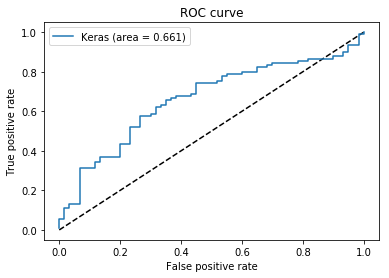

In [83]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.

In [ ]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()